In [ ]:
 from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/2020_AU_Region_Mobility_Report.csv')

data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-15,4.0,3.0,-2.0,3.0,3.0,0.0
1,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-16,3.0,5.0,9.0,3.0,-1.0,0.0
2,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-17,-1.0,0.0,-6.0,7.0,17.0,-2.0
3,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-18,-3.0,-2.0,-13.0,7.0,14.0,-1.0
4,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-19,-1.0,-1.0,-6.0,8.0,13.0,-1.0


# Data Exploration for Assignment 2:

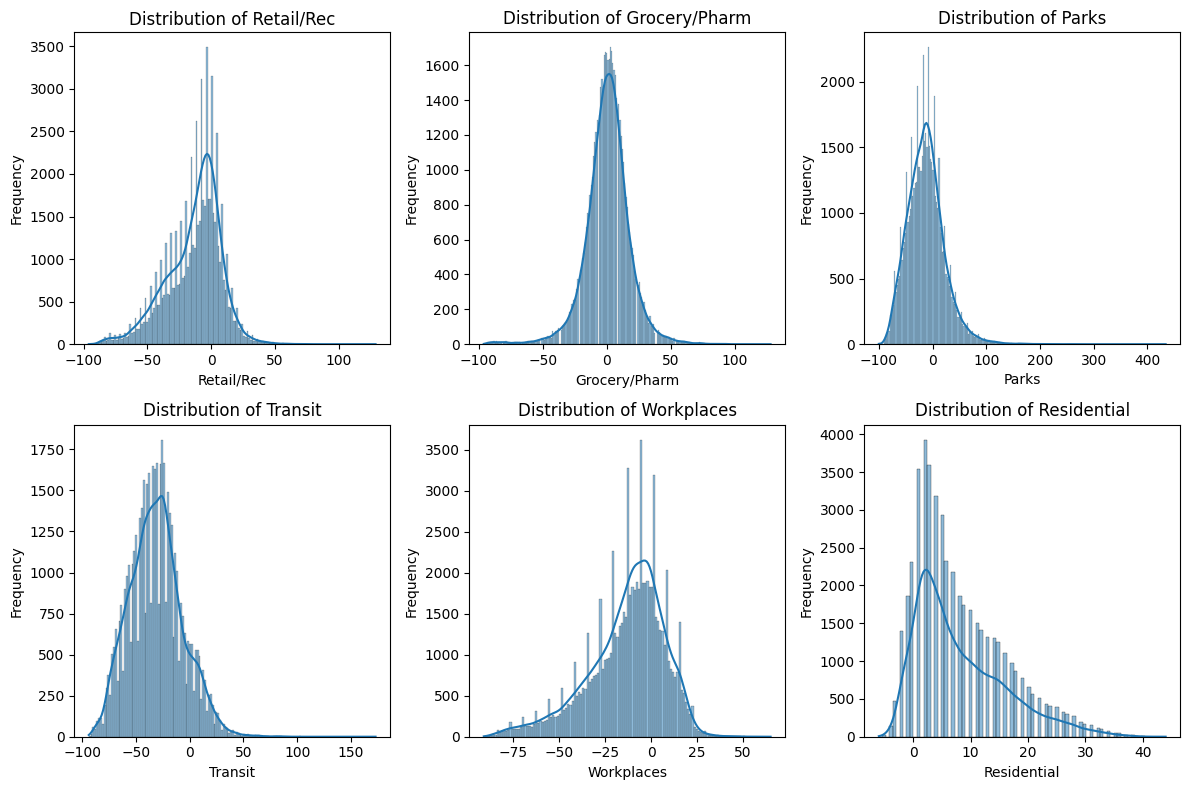

Summary Statistics:
         Retail/Rec  Grocery/Pharm         Parks       Transit    Workplaces  \
count  66554.000000   56171.000000  58192.000000  50013.000000  78609.000000   
mean     -13.287781       0.674084    -12.211438    -31.211025    -13.250569   
std       21.299059      17.413418     34.752009     24.713341     20.778223   
min      -96.000000     -96.000000   -100.000000    -94.000000    -91.000000   
25%      -26.000000      -8.000000    -36.000000    -48.000000    -24.000000   
50%       -9.000000       1.000000    -14.000000    -32.000000    -10.000000   
75%        1.000000      10.000000      7.000000    -16.000000      1.000000   
max      129.000000     128.000000    434.000000    173.000000     65.000000   

        Residential  
count  48487.000000  
mean       8.087652  
std        7.882133  
min       -6.000000  
25%        2.000000  
50%        6.000000  
75%       13.000000  
max       44.000000  

Missing Values:
Region             321
Date                 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Google Mobility dataset (assuming you've already loaded the dataset)
# Replace 'your_dataset.csv' with the actual file path or URL to your dataset.
df =data

# Create shorter column names
short_column_names = {
    'sub_region_1': 'Region',
    'date': 'Date',
    'retail_and_recreation_percent_change_from_baseline': 'Retail/Rec',
    'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery/Pharm',
    'parks_percent_change_from_baseline': 'Parks',
    'transit_stations_percent_change_from_baseline': 'Transit',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'residential_percent_change_from_baseline': 'Residential'
}

# Rename columns with shorter names
df = df.rename(columns=short_column_names)

# Select the columns of interest with shorter names
columns_of_interest = list(short_column_names.values())

# Create a subset of the DataFrame with selected columns
subset_df = df[columns_of_interest]

# Summarize statistics for numeric columns
summary_stats = subset_df.describe()

# Check for missing values
missing_values = subset_df.isnull().sum()

# Visualize data distributions
plt.figure(figsize=(12, 8))

# Loop through the columns and create histograms
for i, col in enumerate(columns_of_interest[2:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(subset_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display summary statistics and missing value counts
print("Summary Statistics:")
print(summary_stats)

print("\nMissing Values:")
print(missing_values)


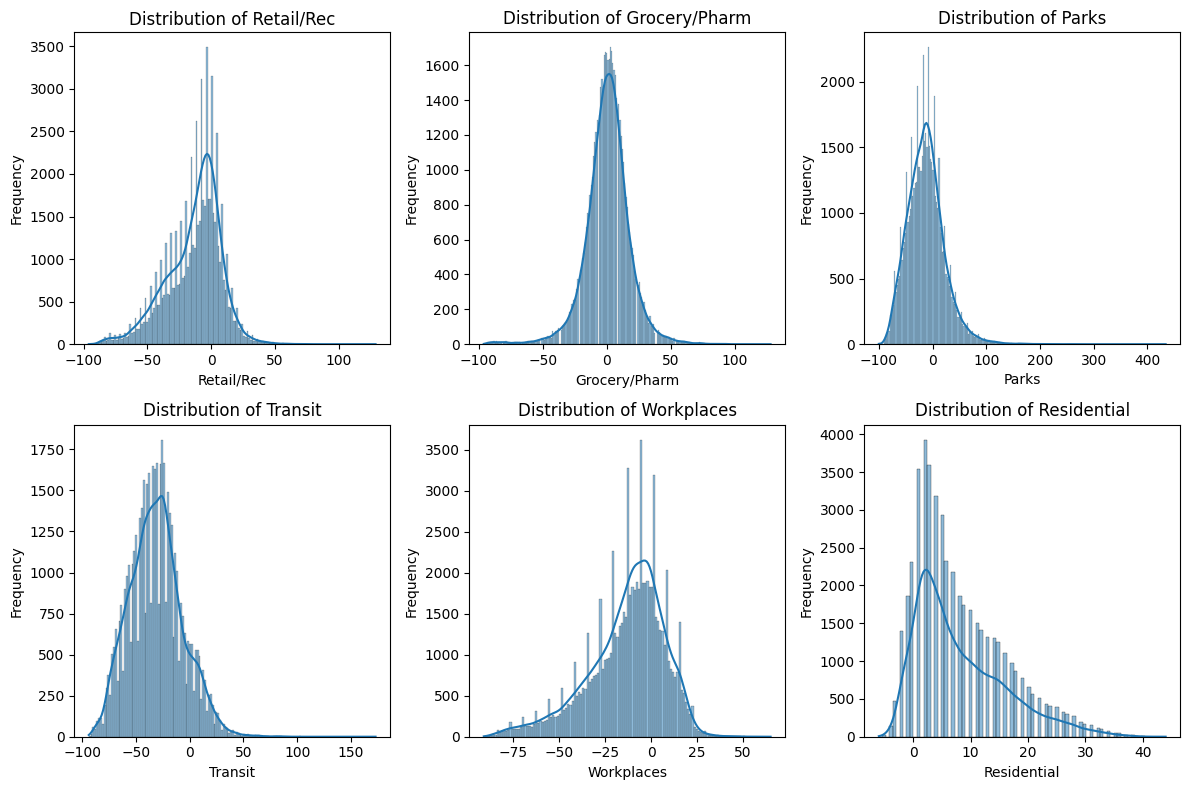

<ipython-input-17-304bc422a2fa>:45: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


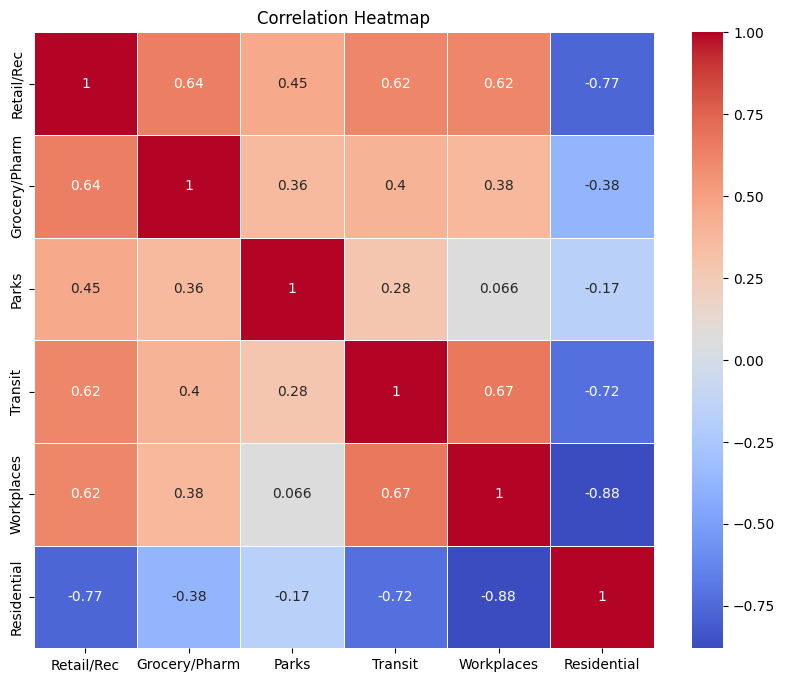

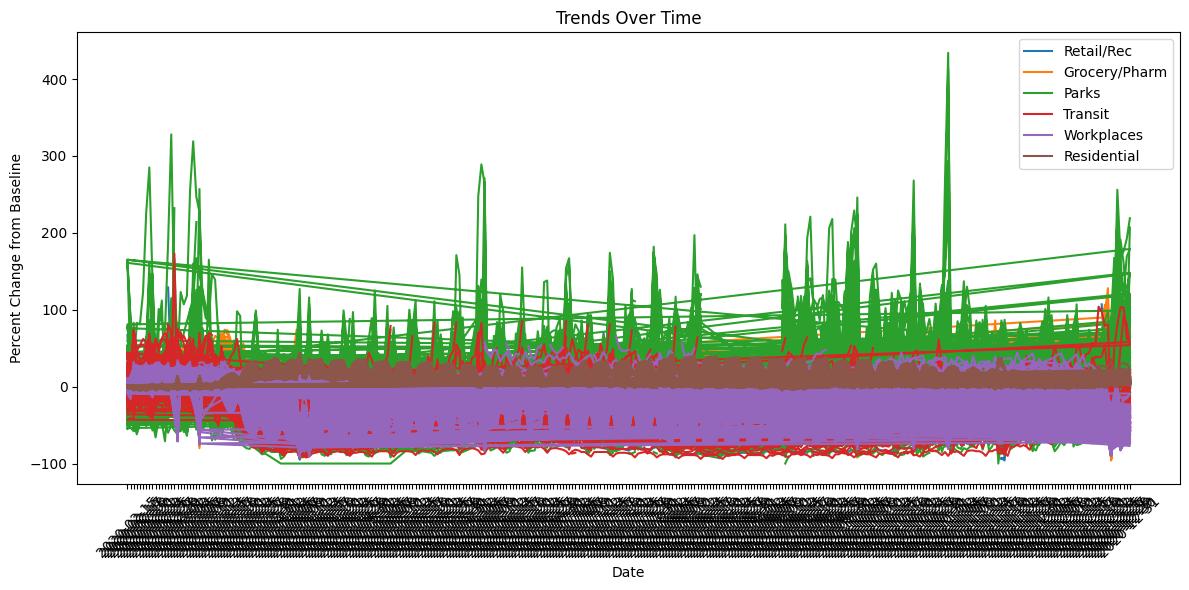

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Google Mobility dataset (assuming you've already loaded the dataset)
# Replace 'your_dataset.csv' with the actual file path or URL to your dataset.
df = data

# Create shorter column names
short_column_names = {
    'sub_region_1': 'Region',
    'date': 'Date',
    'retail_and_recreation_percent_change_from_baseline': 'Retail/Rec',
    'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery/Pharm',
    'parks_percent_change_from_baseline': 'Parks',
    'transit_stations_percent_change_from_baseline': 'Transit',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'residential_percent_change_from_baseline': 'Residential'
}

# Rename columns with shorter names
df = df.rename(columns=short_column_names)

# Select the columns of interest with shorter names
columns_of_interest = list(short_column_names.values())

# Create a subset of the DataFrame with selected columns
subset_df = df[columns_of_interest]

# Visualize data distributions
plt.figure(figsize=(12, 8))

# Loop through the columns and create histograms
for i, col in enumerate(columns_of_interest[2:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(subset_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create a heatmap to visualize correlations between numeric columns
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Plot line graphs for selected columns over time
plt.figure(figsize=(12, 6))
for col in columns_of_interest[2:]:
    plt.plot(subset_df['Date'], subset_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')
plt.title('Trends Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


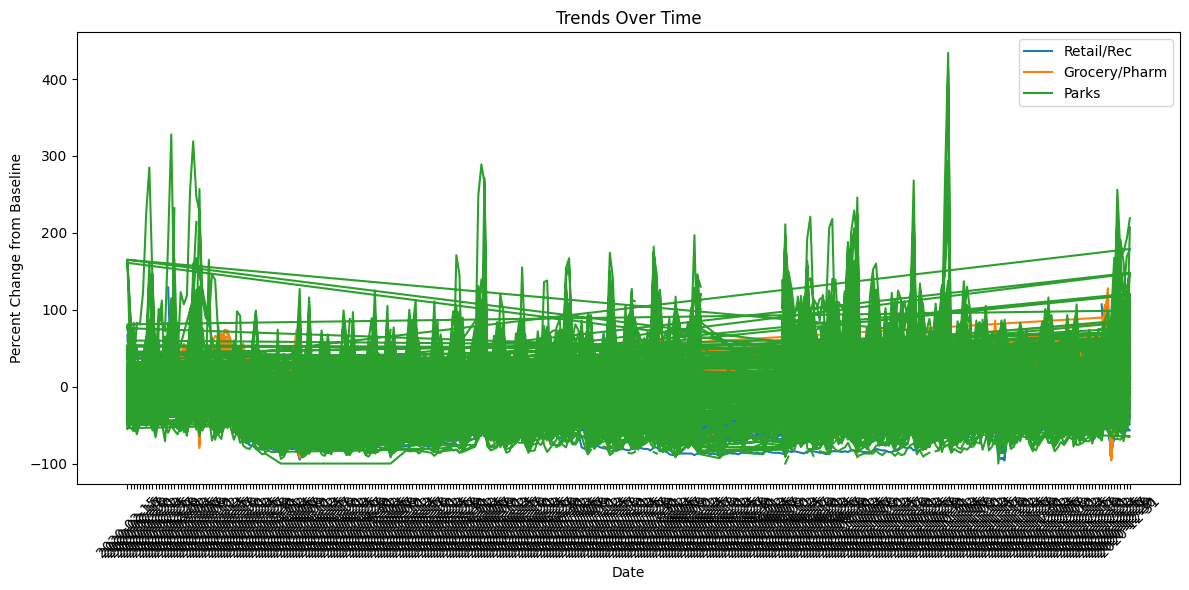

In [ ]:
# Select a subset of columns for plotting
columns_of_interest = ['Date', 'Retail/Rec', 'Grocery/Pharm', 'Parks']

# Create a subset of the DataFrame with selected columns
subset_df = df[columns_of_interest]

# Plot line graphs for selected columns over time
plt.figure(figsize=(12, 6))

for col in columns_of_interest[1:]:
    plt.plot(subset_df['Date'], subset_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')
plt.title('Trends Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

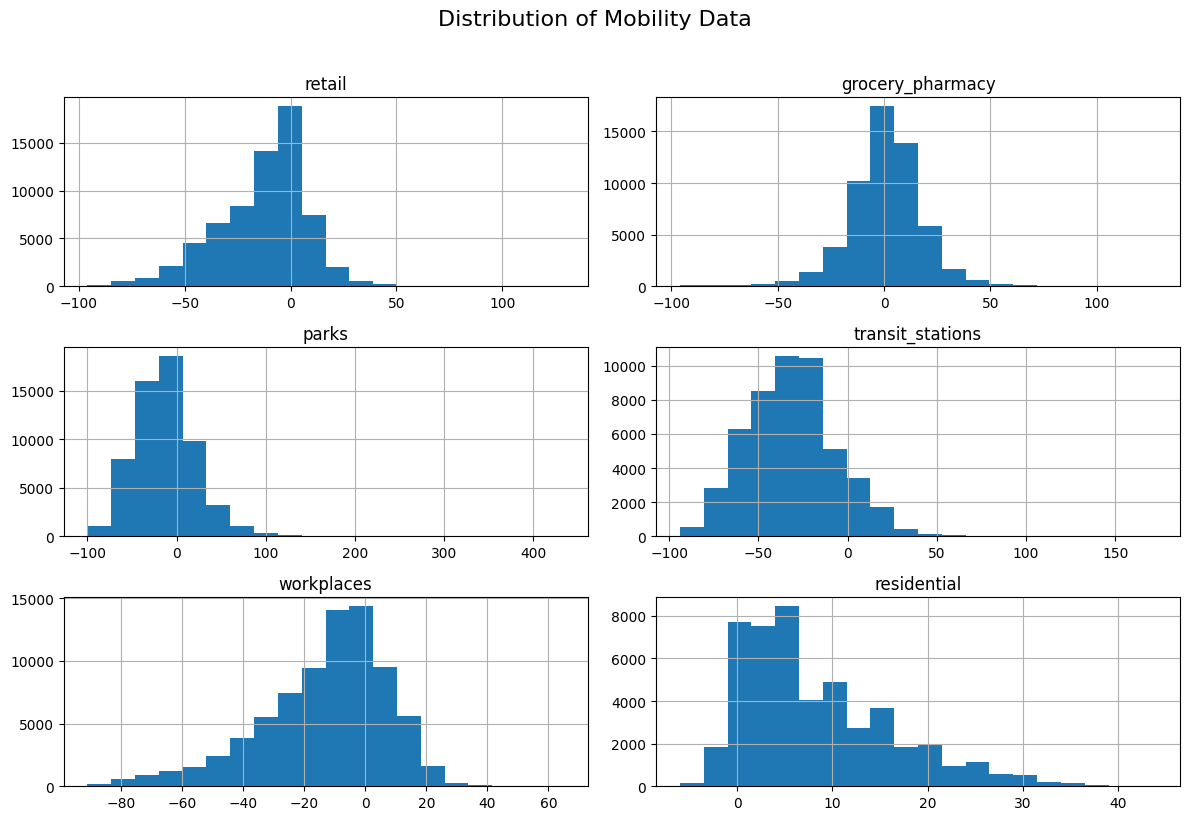

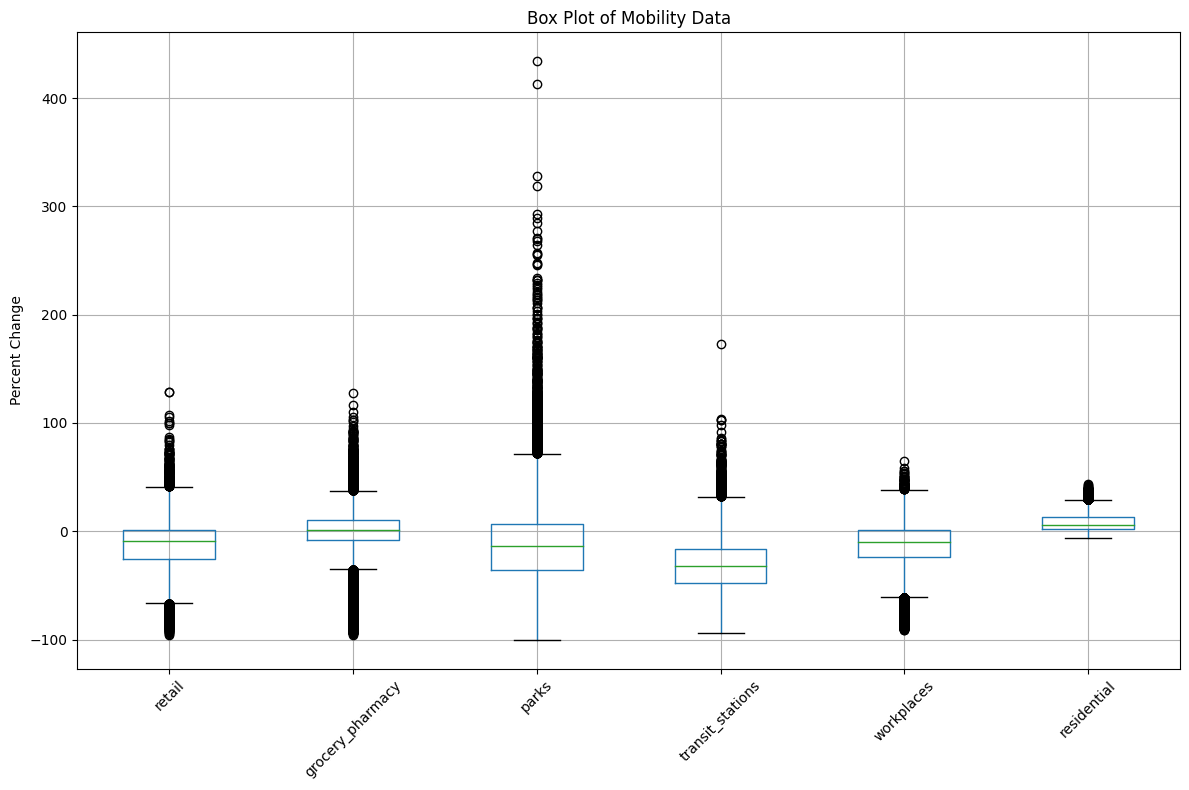

Summary Statistics:
             retail  grocery_pharmacy         parks  transit_stations  \
count  66554.000000      56171.000000  58192.000000      50013.000000   
mean     -13.287781          0.674084    -12.211438        -31.211025   
std       21.299059         17.413418     34.752009         24.713341   
min      -96.000000        -96.000000   -100.000000        -94.000000   
25%      -26.000000         -8.000000    -36.000000        -48.000000   
50%       -9.000000          1.000000    -14.000000        -32.000000   
75%        1.000000         10.000000      7.000000        -16.000000   
max      129.000000        128.000000    434.000000        173.000000   

         workplaces   residential  
count  78609.000000  48487.000000  
mean     -13.250569      8.087652  
std       20.778223      7.882133  
min      -91.000000     -6.000000  
25%      -24.000000      2.000000  
50%      -10.000000      6.000000  
75%        1.000000     13.000000  
max       65.000000     44.000000 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Google Mobility dataset
data = data

# Rename the columns to shorter names
data = data.rename(columns={
    'retail_and_recreation_percent_change_from_baseline': 'retail',
    'grocery_and_pharmacy_percent_change_from_baseline': 'grocery_pharmacy',
    'parks_percent_change_from_baseline': 'parks',
    'transit_stations_percent_change_from_baseline': 'transit_stations',
    'workplaces_percent_change_from_baseline': 'workplaces',
    'residential_percent_change_from_baseline': 'residential'
})

# Select the relevant columns
columns_of_interest = ['sub_region_1', 'date', 'retail', 'grocery_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential']

# Subset the data to include only the selected columns
subset_data = data[columns_of_interest]

# Summary statistics
summary_stats = subset_data.describe()

# Check for missing values
missing_values = subset_data.isnull().sum()

# Data visualization
# Create histograms for selected columns
subset_data.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Mobility Data', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Create box plots for selected columns
subset_data.boxplot(figsize=(12, 8), rot=45)
plt.title('Box Plot of Mobility Data')
plt.ylabel('Percent Change')
plt.tight_layout()
plt.show()

# Display summary statistics and missing values
print("Summary Statistics:")
print(summary_stats)

print("\nMissing Values:")
print(missing_values)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the Google Mobility dataset
data = data

# Combine 'sub_region_1' and 'sub_region_2' to get the state name
data['state'] = data['sub_region_1'].fillna('') + ', ' + data['sub_region_2'].fillna('')

# Select the relevant columns
columns_of_interest = ['state', 'date',
                       'retail_and_recreation_percent_change_from_baseline',
                       'grocery_and_pharmacy_percent_change_from_baseline',
                       'parks_percent_change_from_baseline',
                       'transit_stations_percent_change_from_baseline',
                       'workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline']

# Subset the data to include only Queensland and the selected columns
queensland_data = data[data['sub_region_1'].str.contains('Queensland')][columns_of_interest]

# Convert the 'date' column to a datetime object
queensland_data['date'] = pd.to_datetime(queensland_data['date'])

# Set the 'date' column as the index
queensland_data.set_index('date', inplace=True)

# Summary statistics
summary_stats = queensland_data.describe()

# Check for missing values
missing_values = queensland_data.isnull().sum()

# Data visualization
# Create histograms for selected columns
queensland_data.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Mobility Data in Queensland', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Create box plots for selected columns
queensland_data.boxplot(figsize=(12, 8), rot=45)
plt.title('Box Plot of Mobility Data in Queensland')
plt.ylabel('Percent Change from Baseline')
plt.tight_layout()
plt.show()

# Decompose time series data
decomposition = seasonal_decompose(queensland_data['retail_and_recreation_percent_change_from_baseline'],
                                   model='additive', period=7)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Retail and Recreation Mobility in Queensland', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Display summary statistics and missing values
print("Summary Statistics:")
print(summary_stats)

print("\nMissing Values:")
print(missing_values)


ValueError: ignored

In [ ]:
data.fillna(0)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AU,Australia,0,0,0.0,0,0.0,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-15,4.0,3.0,-2.0,3.0,3.0,0.0
1,AU,Australia,0,0,0.0,0,0.0,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-16,3.0,5.0,9.0,3.0,-1.0,0.0
2,AU,Australia,0,0,0.0,0,0.0,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-17,-1.0,0.0,-6.0,7.0,17.0,-2.0
3,AU,Australia,0,0,0.0,0,0.0,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-18,-3.0,-2.0,-13.0,7.0,14.0,-1.0
4,AU,Australia,0,0,0.0,0,0.0,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-19,-1.0,-1.0,-6.0,8.0,13.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85325,AU,Australia,Western Australia,Town of Victoria Park,0.0,0,0.0,ChIJq7eDUJu7MioR86Tu9g2p2pQ,2020-12-27,4.0,-12.0,-19.0,-28.0,-5.0,0.0
85326,AU,Australia,Western Australia,Town of Victoria Park,0.0,0,0.0,ChIJq7eDUJu7MioR86Tu9g2p2pQ,2020-12-28,11.0,-15.0,-11.0,-54.0,-73.0,15.0
85327,AU,Australia,Western Australia,Town of Victoria Park,0.0,0,0.0,ChIJq7eDUJu7MioR86Tu9g2p2pQ,2020-12-29,15.0,17.0,-11.0,-46.0,-53.0,11.0
85328,AU,Australia,Western Australia,Town of Victoria Park,0.0,0,0.0,ChIJq7eDUJu7MioR86Tu9g2p2pQ,2020-12-30,17.0,21.0,-8.0,-50.0,-52.0,11.0


In [ ]:
data.isna().any().sum()

11

In [ ]:
data.count()

country_region_code                                   85330
country_region                                        85330
sub_region_1                                          85009
sub_region_2                                          82441
metro_area                                                0
iso_3166_2_code                                        2568
census_fips_code                                          0
place_id                                              85330
date                                                  85330
retail_and_recreation_percent_change_from_baseline    66554
grocery_and_pharmacy_percent_change_from_baseline     56171
parks_percent_change_from_baseline                    58192
transit_stations_percent_change_from_baseline         50013
workplaces_percent_change_from_baseline               78609
residential_percent_change_from_baseline              48487
dtype: int64

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
85325    False
85326    False
85327    False
85328    False
85329    False
Length: 85330, dtype: bool

In [ ]:
data.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [ ]:
data['grocery_and_pharmacy_percent_change_from_baseline'].describe()

count    56171.000000
mean         0.674084
std         17.413418
min        -96.000000
25%         -8.000000
50%          1.000000
75%         10.000000
max        128.000000
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64

<ipython-input-8-f1912a97244d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['grocery_and_pharmacy_percent_change_from_baseline']);


Skewness: -0.405202
Kurtosis: 3.788226


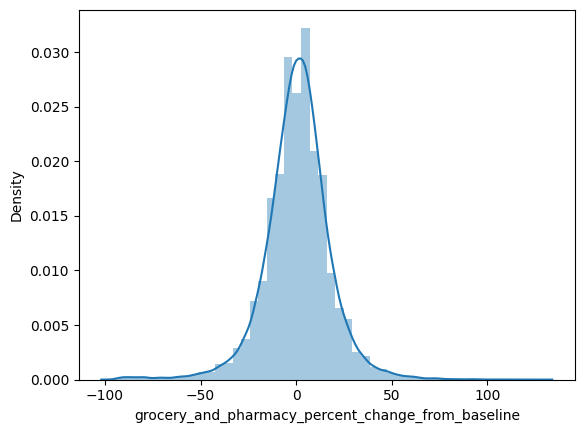

In [ ]:
sns.distplot(data['grocery_and_pharmacy_percent_change_from_baseline']);

print("Skewness: %f" % data['grocery_and_pharmacy_percent_change_from_baseline'].skew())
print("Kurtosis: %f" % data['grocery_and_pharmacy_percent_change_from_baseline'].kurt())

In [ ]:
data['residential_percent_change_from_baseline'].describe()


count    48487.000000
mean         8.087652
std          7.882133
min         -6.000000
25%          2.000000
50%          6.000000
75%         13.000000
max         44.000000
Name: residential_percent_change_from_baseline, dtype: float64

<ipython-input-10-6edc7a3db67d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['residential_percent_change_from_baseline']);


Skewness: 1.026457
Kurtosis: 0.629590


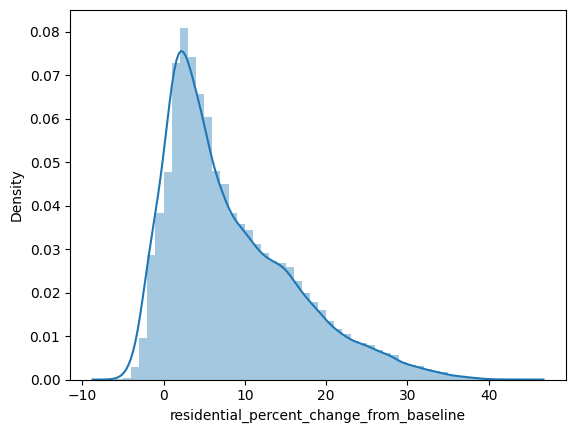

In [ ]:
sns.distplot(data['residential_percent_change_from_baseline']);

print("Skewness: %f" % data['residential_percent_change_from_baseline'].skew())
print("Kurtosis: %f" % data['residential_percent_change_from_baseline'].kurt())

In [ ]:
data['transit_stations_percent_change_from_baseline'].describe()

count    50013.000000
mean       -31.211025
std         24.713341
min        -94.000000
25%        -48.000000
50%        -32.000000
75%        -16.000000
max        173.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64

<ipython-input-12-14fc0da11365>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['transit_stations_percent_change_from_baseline']);


Skewness: 0.351638
Kurtosis: 0.263205


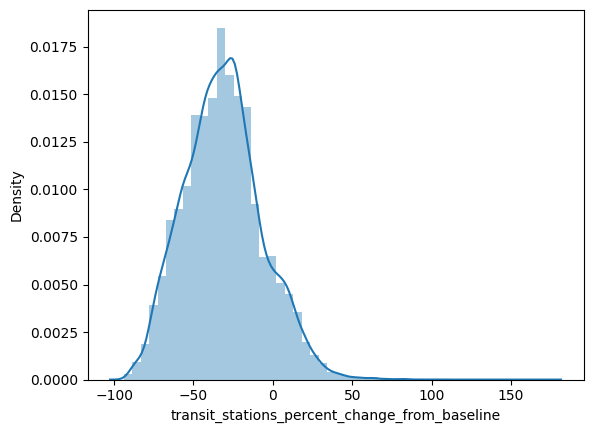

In [ ]:
sns.distplot(data['transit_stations_percent_change_from_baseline']);

print("Skewness: %f" % data['transit_stations_percent_change_from_baseline'].skew())
print("Kurtosis: %f" % data['transit_stations_percent_change_from_baseline'].kurt())

# DB Create and Subsets

In [ ]:
df=data
australia_data = df[df['country_region'] == 'Australia']
australia_data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-15,4.0,3.0,-2.0,3.0,3.0,0.0
1,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-16,3.0,5.0,9.0,3.0,-1.0,0.0
2,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-17,-1.0,0.0,-6.0,7.0,17.0,-2.0
3,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-18,-3.0,-2.0,-13.0,7.0,14.0,-1.0
4,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-19,-1.0,-1.0,-6.0,8.0,13.0,-1.0


In [ ]:
queensland_data = australia_data[australia_data['sub_region_1'] == 'Queensland']
northernTerritory_data = australia_data[australia_data['sub_region_1'] == 'Northern Territory']

In [ ]:
queensland_data.to_csv('qld_data.csv', index=False)

In [ ]:
northernTerritory_data.to_csv('nt_data.csv', index=False)

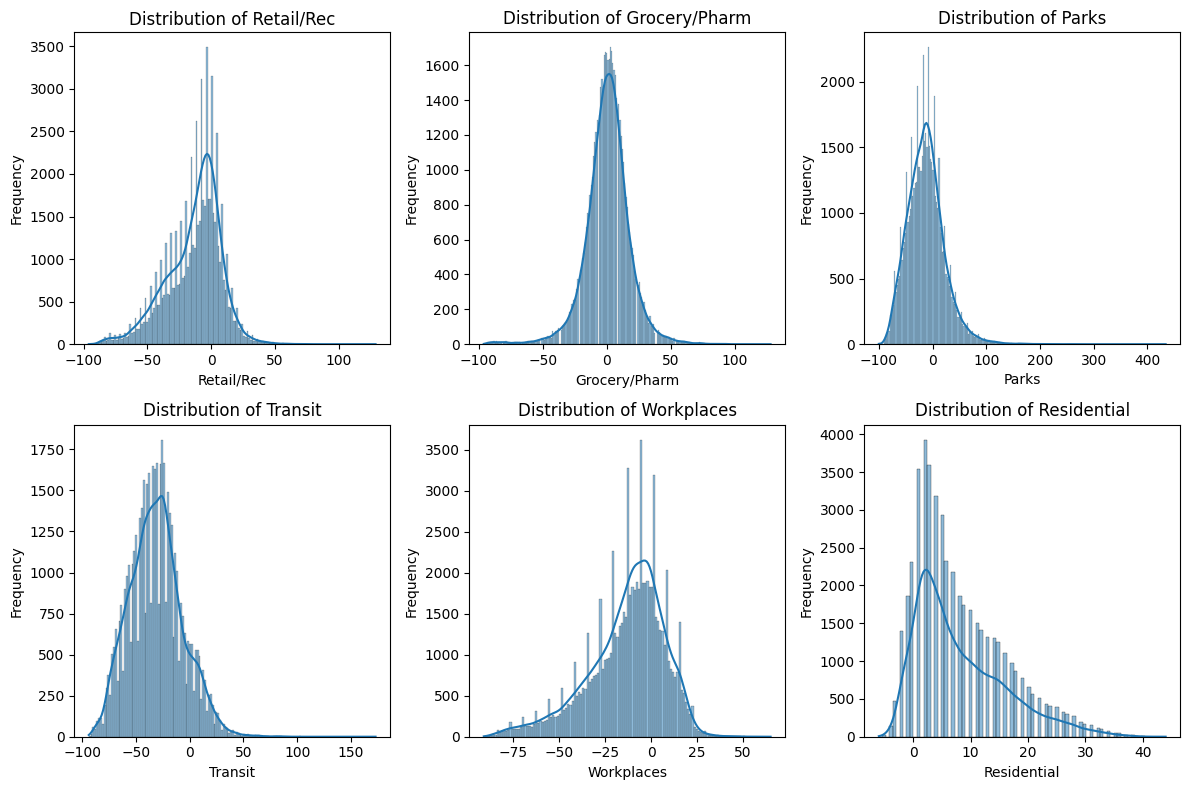

Summary Statistics:
         Retail/Rec  Grocery/Pharm         Parks       Transit    Workplaces  \
count  66554.000000   56171.000000  58192.000000  50013.000000  78609.000000   
mean     -13.287781       0.674084    -12.211438    -31.211025    -13.250569   
std       21.299059      17.413418     34.752009     24.713341     20.778223   
min      -96.000000     -96.000000   -100.000000    -94.000000    -91.000000   
25%      -26.000000      -8.000000    -36.000000    -48.000000    -24.000000   
50%       -9.000000       1.000000    -14.000000    -32.000000    -10.000000   
75%        1.000000      10.000000      7.000000    -16.000000      1.000000   
max      129.000000     128.000000    434.000000    173.000000     65.000000   

        Residential  
count  48487.000000  
mean       8.087652  
std        7.882133  
min       -6.000000  
25%        2.000000  
50%        6.000000  
75%       13.000000  
max       44.000000  

Missing Values:
Region             321
Date                 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Google Mobility dataset (assuming you've already loaded the dataset)
# Replace 'your_dataset.csv' with the actual file path or URL to your dataset.
df =data

# Create shorter column names
short_column_names = {
    'sub_region_1': 'Region',
    'date': 'Date',
    'retail_and_recreation_percent_change_from_baseline': 'Retail/Rec',
    'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery/Pharm',
    'parks_percent_change_from_baseline': 'Parks',
    'transit_stations_percent_change_from_baseline': 'Transit',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'residential_percent_change_from_baseline': 'Residential'
}

# Rename columns with shorter names
df = df.rename(columns=short_column_names)

# Select the columns of interest with shorter names
columns_of_interest = list(short_column_names.values())

# Create a subset of the DataFrame with selected columns
subset_df = df[columns_of_interest]

# Summarize statistics for numeric columns
summary_stats = subset_df.describe()

# Check for missing values
missing_values = subset_df.isnull().sum()

# Visualize data distributions
plt.figure(figsize=(12, 8))

# Loop through the columns and create histograms
for i, col in enumerate(columns_of_interest[2:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(subset_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display summary statistics and missing value counts
print("Summary Statistics:")
print(summary_stats)

print("\nMissing Values:")
print(missing_values)


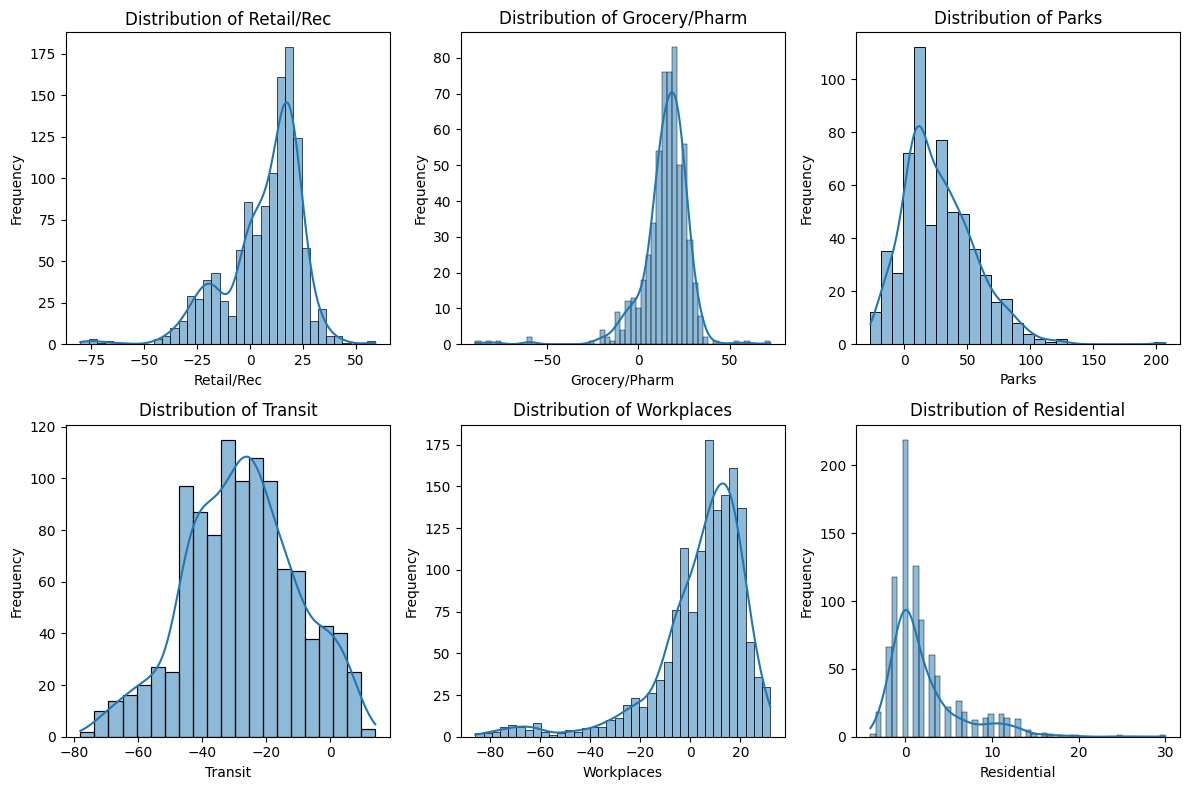

Summary Statistics:
        Retail/Rec  Grocery/Pharm       Parks      Transit   Workplaces  \
count  1187.000000     593.000000  592.000000  1075.000000  1509.000000   
mean      6.694187      14.833052   27.317568   -27.663256     4.167661   
std      17.857927      13.443228   28.274408    17.403688    18.866426   
min     -80.000000     -89.000000  -27.000000   -78.000000   -86.000000   
25%      -2.000000      10.000000    8.000000   -39.000000    -3.000000   
50%      12.000000      17.000000   24.000000   -27.000000     9.000000   
75%      19.000000      22.000000   45.000000   -16.000000    16.000000   
max      59.000000      72.000000  207.000000    14.000000    32.000000   

       Residential  
count   910.000000  
mean      2.140659  
std       4.164124  
min      -4.000000  
25%       0.000000  
50%       1.000000  
75%       3.000000  
max      30.000000  

Missing Values:
Region             0
Date               0
Retail/Rec       388
Grocery/Pharm    982
Parks         

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Google Mobility dataset (assuming you've already loaded the dataset)
# Replace 'your_dataset.csv' with the actual file path or URL to your dataset.
df =northernTerritory_data

# Create shorter column names
short_column_names = {
    'sub_region_1': 'Region',
    'date': 'Date',
    'retail_and_recreation_percent_change_from_baseline': 'Retail/Rec',
    'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery/Pharm',
    'parks_percent_change_from_baseline': 'Parks',
    'transit_stations_percent_change_from_baseline': 'Transit',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'residential_percent_change_from_baseline': 'Residential'
}

# Rename columns with shorter names
df = df.rename(columns=short_column_names)

# Select the columns of interest with shorter names
columns_of_interest = list(short_column_names.values())

# Create a subset of the DataFrame with selected columns
subset_df = df[columns_of_interest]

# Summarize statistics for numeric columns
summary_stats = subset_df.describe()

# Check for missing values
missing_values = subset_df.isnull().sum()

# Visualize data distributions
plt.figure(figsize=(12, 8))

# Loop through the columns and create histograms
for i, col in enumerate(columns_of_interest[2:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(subset_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display summary statistics and missing value counts
print("Summary Statistics:")
print(summary_stats)

print("\nMissing Values:")
print(missing_values)


SubSet and DataBase Creation

In [ ]:
!pip3 install pymongo

import pymongo
from pymongo import MongoClient
client = MongoClient('40.82.211.185',27000, username = "admin", password = "abc123")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 27.1 MB/s eta 0:00:00


In [ ]:
client.server_info()

{'version': '7.0.1',
 'gitVersion': '425a0454d12f2664f9e31002bbe4a386a25345b5',
 'modules': [],
 'allocator': 'tcmalloc',
 'javascriptEngine': 'mozjs',
 'sysInfo': 'deprecated',
 'versionArray': [7, 0, 1, 0],
 'openssl': {'running': 'OpenSSL 1.1.1f  31 Mar 2020',
  'compiled': 'OpenSSL 1.1.1f  31 Mar 2020'},
 'buildEnvironment': {'distmod': 'ubuntu2004',
  'distarch': 'x86_64',
  'cc': '/opt/mongodbtoolchain/v4/bin/gcc: gcc (GCC) 11.3.0',
  'ccflags': '-Werror -include mongo/platform/basic.h -ffp-contract=off -fasynchronous-unwind-tables -g2 -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -gdwarf-5 -fno-omit-frame-pointer -fno-strict-aliasing -O2 -march=sandybridge -mtune=generic -mprefer-vector-width=128 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-const-variable -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -gdwarf64 -Wa,--nocompress-debug-sections -fno-builtin-memcmp -Wimplicit-fallthrough=5',
  'cxx': '

In [ ]:
client.list_database_names()

['Qld_covid', 'admin', 'bdm', 'config', 'csc6002-3502', 'local']

In [ ]:
db=client['bdm']

In [ ]:
db

Database(MongoClient(host=['40.82.211.185:27000'], document_class=dict, tz_aware=False, connect=True), 'bdm')

In [ ]:
db.create_collection

<bound method Database.create_collection of Database(MongoClient(host=['40.82.211.185:27000'], document_class=dict, tz_aware=False, connect=True), 'bdm')>

In [ ]:
collection=db["au_data"]

In [ ]:
collection

Collection(Database(MongoClient(host=['40.82.211.185:27000'], document_class=dict, tz_aware=False, connect=True), 'bdm'), 'au_data')

In [ ]:
au_data.head()

NameError: ignored

In [ ]:
subset_au_data = australia_data[['country_region','sub_region_1','sub_region_2','metro_area','date','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                            'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline','parks_percent_change_from_baseline',
                       'transit_stations_percent_change_from_baseline',]]

In [ ]:
subset_au_data.head()

,country_region,sub_region_1,sub_region_2,metro_area,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline
0,Australia,NaN,NaN,NaN,2020-02-15,4.0,3.0,3.0,0.0,-2.0,3.0
1,Australia,NaN,NaN,NaN,2020-02-16,3.0,5.0,-1.0,0.0,9.0,3.0
2,Australia,NaN,NaN,NaN,2020-02-17,-1.0,0.0,17.0,-2.0,-6.0,7.0
3,Australia,NaN,NaN,NaN,2020-02-18,-3.0,-2.0,14.0,-1.0,-13.0,7.0
4,Australia,NaN,NaN,NaN,2020-02-19,-1.0,-1.0,13.0,-1.0,-6.0,8.0


In [ ]:
subset_au_data['date'] =  pd.to_datetime(subset_au_data['date'], format="%Y-%m-%d")

<ipython-input-54-cc32ebdbc3c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_au_data['date'] =  pd.to_datetime(subset_au_data['date'], format="%Y-%m-%d")


In [ ]:
subset_au_data.head()

,country_region,sub_region_1,sub_region_2,metro_area,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline
0,Australia,NaN,NaN,NaN,2020-02-15,4.0,3.0,3.0,0.0,-2.0,3.0
1,Australia,NaN,NaN,NaN,2020-02-16,3.0,5.0,-1.0,0.0,9.0,3.0
2,Australia,NaN,NaN,NaN,2020-02-17,-1.0,0.0,17.0,-2.0,-6.0,7.0
3,Australia,NaN,NaN,NaN,2020-02-18,-3.0,-2.0,14.0,-1.0,-13.0,7.0
4,Australia,NaN,NaN,NaN,2020-02-19,-1.0,-1.0,13.0,-1.0,-6.0,8.0


In [ ]:
dic_dat = subset_au_data.T

In [ ]:
dic_dat

,0,1,2,3,4,5,6,7,8,9,...,85320,85321,85322,85323,85324,85325,85326,85327,85328,85329
country_region,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,...,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
sub_region_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Western Australia,Western Australia,Western Australia,Western Australia,Western Australia,Western Australia,Western Australia,Western Australia,Western Australia,Western Australia
sub_region_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Town of Victoria Park,Town of Victoria Park,Town of Victoria Park,Town of Victoria Park,Town of Victoria Park,Town of Victoria Park,Town of Victoria Park,Town of Victoria Park,Town of Victoria Park,Town of Victoria Park
metro_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,...,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-25 00:00:00,2020-12-26 00:00:00,2020-12-27 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00
retail_and_recreation_percent_change_from_baseline,4.0,3.0,-1.0,-3.0,-1.0,0.0,3.0,5.0,3.0,-1.0,...,29.0,37.0,23.0,-66.0,-30.0,4.0,11.0,15.0,17.0,60.0
grocery_and_pharmacy_percent_change_from_baseline,3.0,5.0,0.0,-2.0,-1.0,1.0,4.0,4.0,4.0,1.0,...,36.0,45.0,70.0,-76.0,-25.0,-12.0,-15.0,17.0,21.0,34.0
workplaces_percent_change_from_baseline,3.0,-1.0,17.0,14.0,13.0,13.0,16.0,3.0,-2.0,17.0,...,-23.0,-24.0,-44.0,-83.0,-32.0,-5.0,-73.0,-53.0,-52.0,-53.0
residential_percent_change_from_baseline,0.0,0.0,-2.0,-1.0,-1.0,-2.0,-3.0,-1.0,0.0,-1.0,...,5.0,5.0,7.0,12.0,NaN,NaN,15.0,11.0,11.0,8.0
parks_percent_change_from_baseline,-2.0,9.0,-6.0,-13.0,-6.0,5.0,-1.0,10.0,9.0,-10.0,...,2.0,-10.0,-28.0,-29.0,-26.0,-19.0,-11.0,-11.0,-8.0,NaN


In [ ]:
dic_dat =dic_dat.to_dict()
list(dic_dat.values())

[{'country_region': 'Australia',
  'sub_region_1': nan,
  'sub_region_2': nan,
  'metro_area': nan,
  'date': Timestamp('2020-02-15 00:00:00'),
  'retail_and_recreation_percent_change_from_baseline': 4.0,
  'grocery_and_pharmacy_percent_change_from_baseline': 3.0,
  'workplaces_percent_change_from_baseline': 3.0,
  'residential_percent_change_from_baseline': 0.0,
  'parks_percent_change_from_baseline': -2.0,
  'transit_stations_percent_change_from_baseline': 3.0},
 {'country_region': 'Australia',
  'sub_region_1': nan,
  'sub_region_2': nan,
  'metro_area': nan,
  'date': Timestamp('2020-02-16 00:00:00'),
  'retail_and_recreation_percent_change_from_baseline': 3.0,
  'grocery_and_pharmacy_percent_change_from_baseline': 5.0,
  'workplaces_percent_change_from_baseline': -1.0,
  'residential_percent_change_from_baseline': 0.0,
  'parks_percent_change_from_baseline': 9.0,
  'transit_stations_percent_change_from_baseline': 3.0},
 {'country_region': 'Australia',
  'sub_region_1': nan,
  'sub

In [ ]:
list(dic_dat.values())

[{'country_region': 'Australia',
  'sub_region_1': nan,
  'sub_region_2': nan,
  'metro_area': nan,
  'date': Timestamp('2020-02-15 00:00:00'),
  'retail_and_recreation_percent_change_from_baseline': 4.0,
  'grocery_and_pharmacy_percent_change_from_baseline': 3.0,
  'workplaces_percent_change_from_baseline': 3.0,
  'residential_percent_change_from_baseline': 0.0,
  'parks_percent_change_from_baseline': -2.0,
  'transit_stations_percent_change_from_baseline': 3.0},
 {'country_region': 'Australia',
  'sub_region_1': nan,
  'sub_region_2': nan,
  'metro_area': nan,
  'date': Timestamp('2020-02-16 00:00:00'),
  'retail_and_recreation_percent_change_from_baseline': 3.0,
  'grocery_and_pharmacy_percent_change_from_baseline': 5.0,
  'workplaces_percent_change_from_baseline': -1.0,
  'residential_percent_change_from_baseline': 0.0,
  'parks_percent_change_from_baseline': 9.0,
  'transit_stations_percent_change_from_baseline': 3.0},
 {'country_region': 'Australia',
  'sub_region_1': nan,
  'sub

In [ ]:
documents_to_insert = list(subset_au_data.T.to_dict().values())


In [ ]:
client.server_info()

{'version': '7.0.1',
 'gitVersion': '425a0454d12f2664f9e31002bbe4a386a25345b5',
 'modules': [],
 'allocator': 'tcmalloc',
 'javascriptEngine': 'mozjs',
 'sysInfo': 'deprecated',
 'versionArray': [7, 0, 1, 0],
 'openssl': {'running': 'OpenSSL 1.1.1f  31 Mar 2020',
  'compiled': 'OpenSSL 1.1.1f  31 Mar 2020'},
 'buildEnvironment': {'distmod': 'ubuntu2004',
  'distarch': 'x86_64',
  'cc': '/opt/mongodbtoolchain/v4/bin/gcc: gcc (GCC) 11.3.0',
  'ccflags': '-Werror -include mongo/platform/basic.h -ffp-contract=off -fasynchronous-unwind-tables -g2 -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -gdwarf-5 -fno-omit-frame-pointer -fno-strict-aliasing -O2 -march=sandybridge -mtune=generic -mprefer-vector-width=128 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-const-variable -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -gdwarf64 -Wa,--nocompress-debug-sections -fno-builtin-memcmp -Wimplicit-fallthrough=5',
  'cxx': '

In [ ]:
collection.insert_many(documents_to_insert)

In [ ]:
data_from_feb_to_jun = list(collection.find({"date":
                 {"$gte":datetime.datetime(2020, 4, 2),
                  "$lte":datetime.datetime(2020,4, 15)}}))


NameError: ignored

In [ ]:
data_from_feb_to_jun_df = pd.DataFrame(data_from_feb_to_jun)

NameError: ignored

In [ ]:
del(data_from_feb_to_jun_df["_id"])

In [ ]:
data_from_feb_to_jun_df

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline
0,Queensland,2020-04-02,-35.0,-8.0,-33.0,15.0,-27.0,-58.0
1,Queensland,2020-04-03,-35.0,-7.0,-29.0,16.0,-33.0,-58.0
2,Queensland,2020-04-04,-38.0,-11.0,-31.0,15.0,-44.0,-59.0
3,Queensland,2020-04-05,-37.0,-17.0,-33.0,12.0,-35.0,-60.0
4,Queensland,2020-04-06,-31.0,-8.0,-33.0,15.0,-33.0,-58.0
...,...,...,...,...,...,...,...,...
451,Queensland,2020-04-11,-49.0,-19.0,-39.0,NaN,-71.0,NaN
452,Queensland,2020-04-12,-67.0,NaN,-47.0,NaN,-67.0,NaN
453,Queensland,2020-04-13,-68.0,-50.0,-66.0,NaN,-71.0,NaN
454,Queensland,2020-04-14,-40.0,-19.0,-34.0,NaN,-68.0,NaN
